# Visualització gràfica de múltiples variables.
# Visualización gráfica de múltiples variables.
# Graphic display of multiple variables.


- Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.

https://github.com/BIDDL3/Examining-Data.git

- Ejercicio 1

Realiza la práctica del notebook en GitHub "03 EXAMINING DATA" (haz una copia y ejecuta los comandos con el mismo dataset county.txt). Este ejercicio consiste en observar las distintas posibilidades que ofrecen las diferentes librerías de visualización gráfica.

https://github.com/BIDDL3/Examining-Data.git

- Exercise 1

Do the notebook practice on GitHub "03 EXAMINING DATA" (make a copy and run the commands with the same county.txt dataset). This exercise consists of observing the different possibilities offered by different graphic display libraries.

https://github.com/BIDDL3/Examining-Data.git


Notebook 03EXAMINING DATA:

https://github.com/BIDDL3/Examining-Data/blob/9dd5f56a618a276e42174861f8c003f4fc39e08c/03%20EXAMINING%20DATA.ipynb

- Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

https://github.com/BIDDL3/PRE-PROCESSING-DATA.git

Important

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

- Ejercicio 2

Realiza las tareas de preprocesado y adecuación del Dataset que disponemos en el repositorio de GitHub PRE-PROCESSING-FECHA con el objetivo de prepararlo y trabajarlo como dataframe para extraer información.

https://github.com/BIDDL3/PRE-PROCESSING-DATA.git

Importante

El resultado final debe ser un dataframe con las variables de nombre de la película, año y género. ¡También es importante quedarse con un solo género para cada película!

- Exercise 2

Do the tasks of preprocessing and adaptation of the Dataset we have in the GitHub repository PRE-PROCESSING-DATA with the aim of preparing it and working on it as a dataframe to extract information from it.

https://github.com/BIDDL3/PRE-PROCESSING-DATA.git

important

The final result should be a dataframe with the movie name, year and genre variables. It's also important to stick to just one genre for each movie!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/movies.dat', sep='::', encoding='latin-1',header=None, index_col=0, engine='python')

In [5]:
df = df.reset_index(drop=True)
df.index = df.index + 1

In [21]:
df.head()

,1,2
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [6]:
df.columns = ['Nombre', 'Genero']

In [7]:
df['año'] = df['Nombre'].str.extract(r'\((\d{4})\)', expand=False).astype(int)
df['Nombre'] = df['Nombre'].str.replace(r'\(\d{4}\)', '')

<ipython-input-7-a4faf68b8eca>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Nombre'] = df['Nombre'].str.replace(r'\(\d{4}\)', '')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 1 to 3883
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  3883 non-null   object
 1   Genero  3883 non-null   object
 2   año     3883 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [9]:
missing_values = df.isna().any(axis=0)
print(missing_values)

Nombre    False
Genero    False
año       False
dtype: bool


In [10]:
df.tail()

,Nombre,Genero,año
3879,Meet the Parents,Comedy,2000
3880,Requiem for a Dream,Drama,2000
3881,Tigerland,Drama,2000
3882,Two Family House,Drama,2000
3883,"Contender, The",Drama|Thriller,2000


In [12]:
generos_unicos = df['Genero'].str.split('|').explode().unique()

In [13]:
def seleccionar_genero(pelicula):
    generos_pelicula = pelicula.split('|')
    for genero in generos_pelicula:
        if genero in generos_unicos:
            return genero
    return generos_pelicula[0]


In [19]:
df['Genero_unico'] = df['Genero'].apply(seleccionar_genero)

In [36]:
df.head()

,Nombre,Genero,año,Genero_unico
1,Toy Story,Animation|Children's|Comedy,1995,Animation
2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure
3,Grumpier Old Men,Comedy|Romance,1995,Comedy
4,Waiting to Exhale,Comedy|Drama,1995,Comedy
5,Father of the Bride Part II,Comedy,1995,Comedy


In [37]:
df.tail()

,Nombre,Genero,año,Genero_unico
3879,Meet the Parents,Comedy,2000,Comedy
3880,Requiem for a Dream,Drama,2000,Drama
3881,Tigerland,Drama,2000,Drama
3882,Two Family House,Drama,2000,Drama
3883,"Contender, The",Drama|Thriller,2000,Drama


- Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

- Ejercicio 3

Muestra tu creatividad. ¿Qué crees relevante mostrar del Dataset "movies.dat" del ejercicio anterior?

Realiza una o dos representaciones gráficas y justifica tu elección.

- Exercise 3

Show your creativity. What do you think is relevant to show about the Dataset "movies.dat" from the previous exercise?

Make one or two graphical representations and justify your choice.




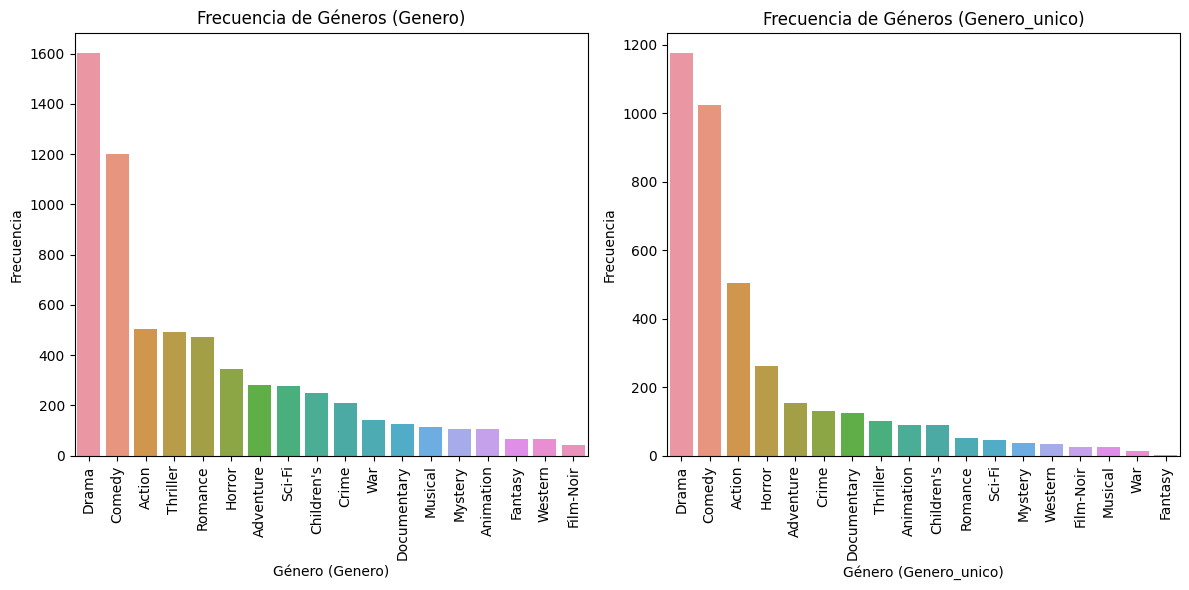

In [47]:
# Contar la frecuencia de cada género en la columna "Genero"
genero_counts = df['Genero'].str.split('|').explode().value_counts()

# Contar la frecuencia de cada género único en la columna "Genero_unico"
genero_unico_counts = df['Genero_unico'].value_counts()

# Crear el gráfico de barras comparando los dos géneros
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=genero_counts.index, y=genero_counts.values)
plt.xlabel('Género (Genero)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Géneros (Genero)')
plt.xticks(rotation='vertical')

plt.subplot(1, 2, 2)
sns.barplot(x=genero_unico_counts.index, y=genero_unico_counts.values)
plt.xlabel('Género (Genero_unico)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Géneros (Genero_unico)')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

Primerament, observem com es distribueix la freqüència dels gèneres inicials i el del gènere únic a través de la base de dades, on es pot veure que les categories de drama i comèdia predominen per sobre de les altres.
També es pot observar que el mètode que hem utilitzat per seleccionar el gènere únic provoca un canvi en la freqüència de les altres categories en comparació amb els gèneres inicials, com era d'esperar, ja que s'eliminen fins a dos valors en molts casos en què la pel·lícula es definia amb fins a tres categories.

Primero vamos a ver cómo se distribuye la frecuencia de los géneros iniciales cómo el del género único sobre la base de datos dónde observamos cómo tanto la categoría de drama y comedia son las que predominan sobre toda las demás.
También se puede observar que el método que hemos utilizado para escoger el género único provoca un cambio en la frecuencia de las demás categorías en comparación a los géneros iniciales cómo era de predecir al descontar hasta dos valores en varios casos dónde la película se definía hasta con tres categorías.

First, let's look at how the frequency of the initial genres and the unique genre is distributed across the database, where it can be observed that the categories of drama and comedy predominate over the others.
It can also be observed that the method we used to select the unique genre causes a change in the frequency of the other categories compared to the initial genres, as expected, since up to two values are subtracted in many cases where the movie was defined with up to three categories.

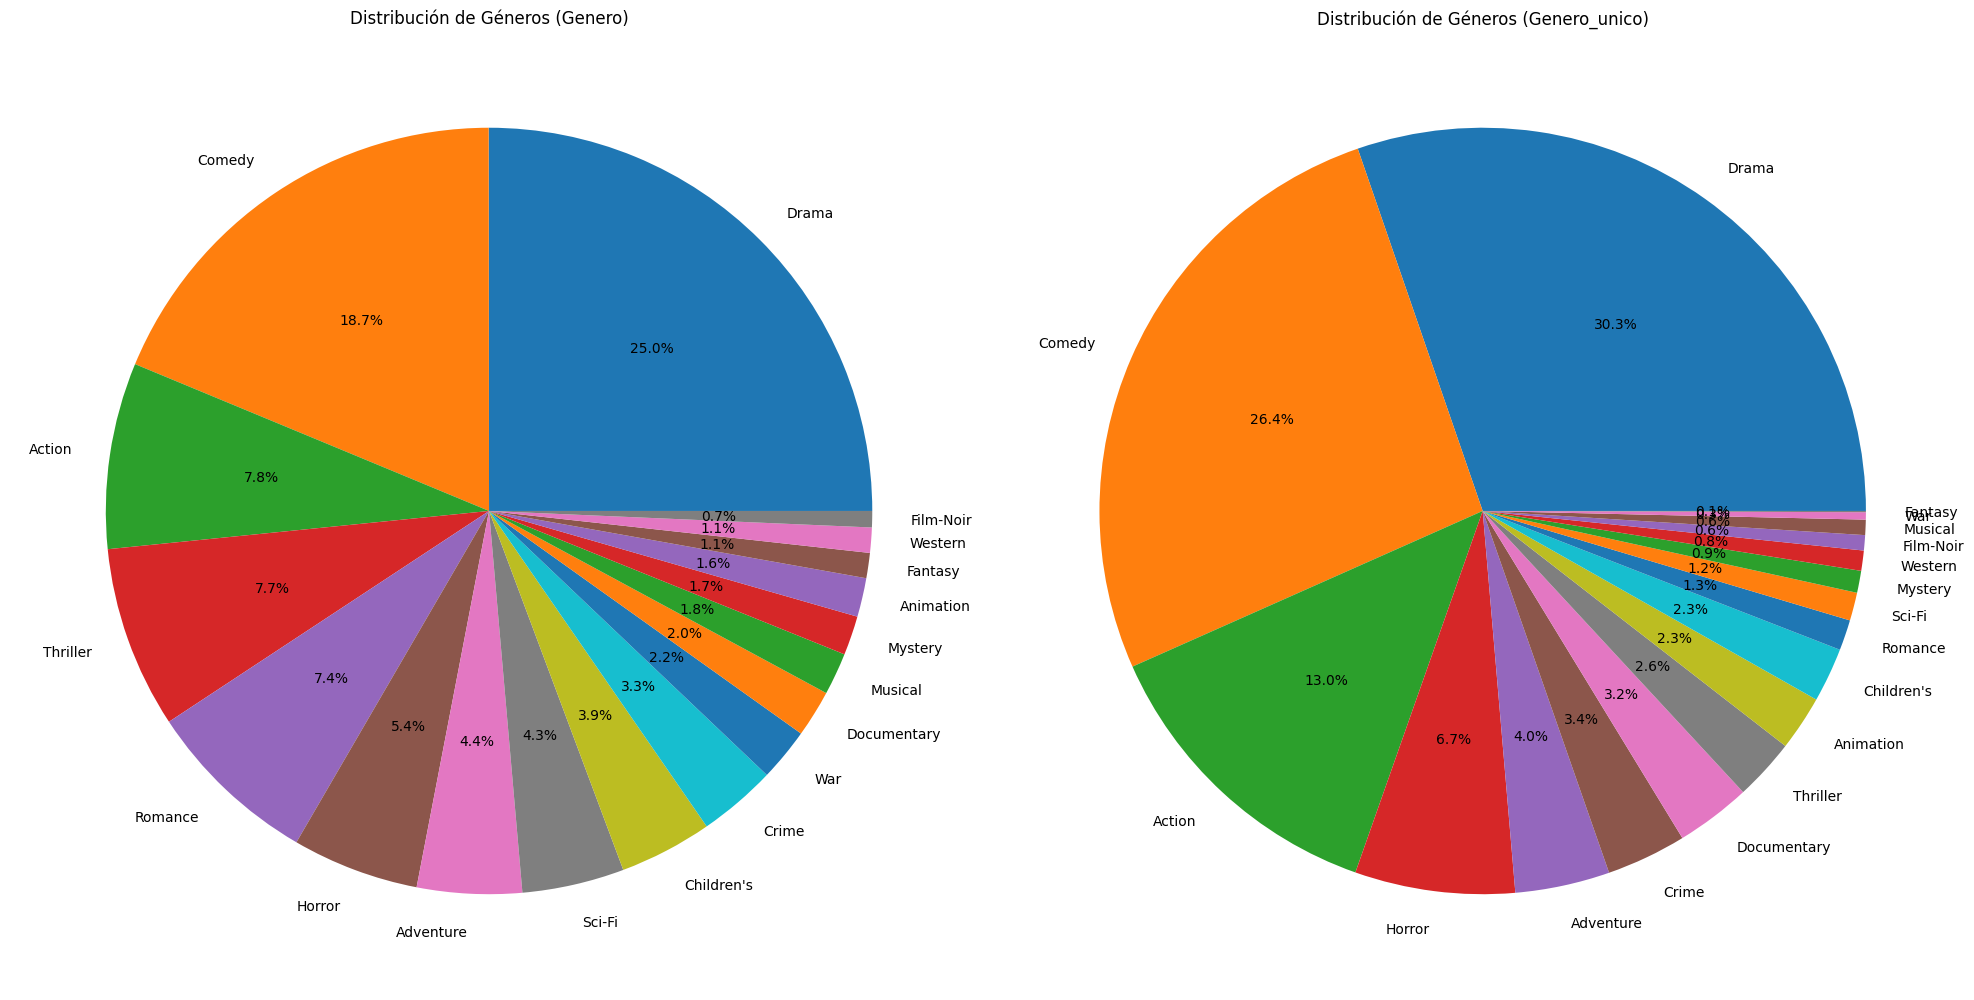

In [52]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%')
plt.title('Distribución de Géneros (Genero)')

plt.subplot(1, 2, 2)
plt.pie(genero_unico_counts, labels=genero_unico_counts.index, autopct='%1.1f%%')
plt.title('Distribución de Géneros (Genero_unico)')

plt.tight_layout()
plt.show()

Seguint la mateixa idea, en aquest cas, des del punt de vista d'un gràfic de pastís, es poden observar les proporcions d'aquestes categories.

Siguiendo la misma idea, en este caso, desde el punto de vista de un gráfico de pastel se pueden observar las proporciones de estas categorías.

Following the same idea, in this case, from the perspective of a pie chart, the proportions of these categories can be observed.





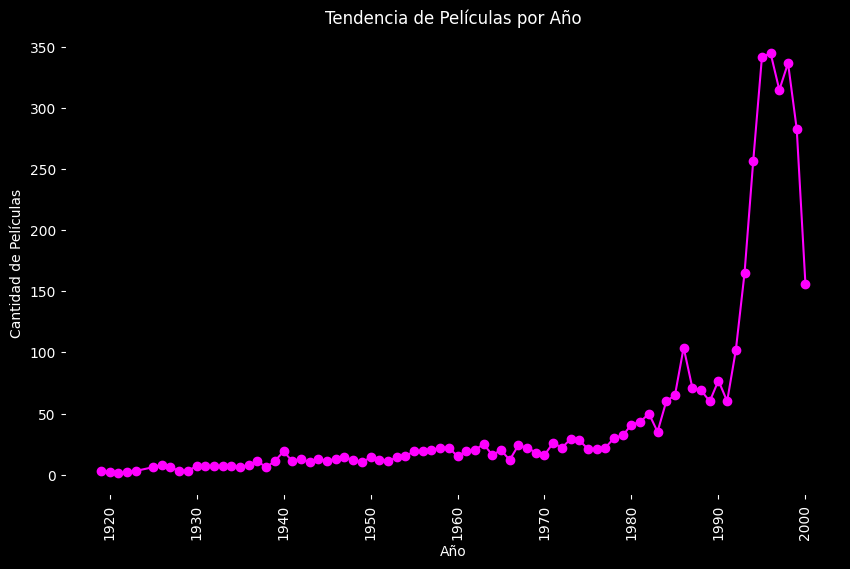

In [77]:
peliculas_año = df['año'].value_counts().sort_index()

# Crear el gráfico de líneas con fondo y línea de color morado vivo
plt.figure(figsize=(10, 6), facecolor='black')
plt.plot(peliculas_año.index, peliculas_año.values, marker='o', color='magenta')
plt.xlabel('Año', color='white')
plt.ylabel('Cantidad de Películas', color='white')
plt.title('Tendencia de Películas por Año', color='white')
plt.tick_params(colors='white')
plt.gca().set_facecolor('black')
plt.xticks(rotation='vertical')
plt.show()

A continuació, es pot observar com es distribueix el nombre de pel·lícules al llarg dels anys recollits a la base de dades, mostrant un lleuger increment a mesura que passen els anys fins a 1980, on comença a tenir un increment una mica més pronunciat amb un pic destacable el 1986 amb 100 pel·lícules, que després disminueix per mantenir la tendència anteriorment esmentada. A partir de 1991 comença un creixement exponencial que es manté fins al 1995, amb un màxim de 350 pel·lícules que durarà 3 anys amb alguna lleugera variació tenint en compte aquest creixement, fins que a partir de 1998 comença a disminuir fins a 150 pel·lícules l'any 2000.

A continuación, se oberva cómo se distribuye el número de películas a lo largo de los años recogidos en la base de datos mostrando un ligero incremento según van pasando los años hasta 1980, dónde empieza tener un incremento de un poco más pronunciado con un pico a considerar en 1986 de 100 películas, que luego baja para mantener la tendencia antes comentada. A partir de 1991 comienza un crecimiento exponencial que se mantiene hasta 1995 dónde llegan a 350 películas que durará 3 años con alguna ligera variación considerando dicho crecimiento hasta que, a partir de 1998 empieza a bajar a 150 películas en el año 2000.

Next, it can be observed how the number of movies is distributed over the years collected in the database, showing a slight increase as the years go by until 1980, where it starts to have a slightly more pronounced increase with a notable peak in 1986 of 100 movies, which then decreases to maintain the previously mentioned trend. Starting from 1991, there is an exponential growth that continues until 1995, reaching a peak of 350 movies that will last for 3 years with some slight variations considering this growth. From 1998 onwards, it starts to decline to 150 movies in the year 2000.


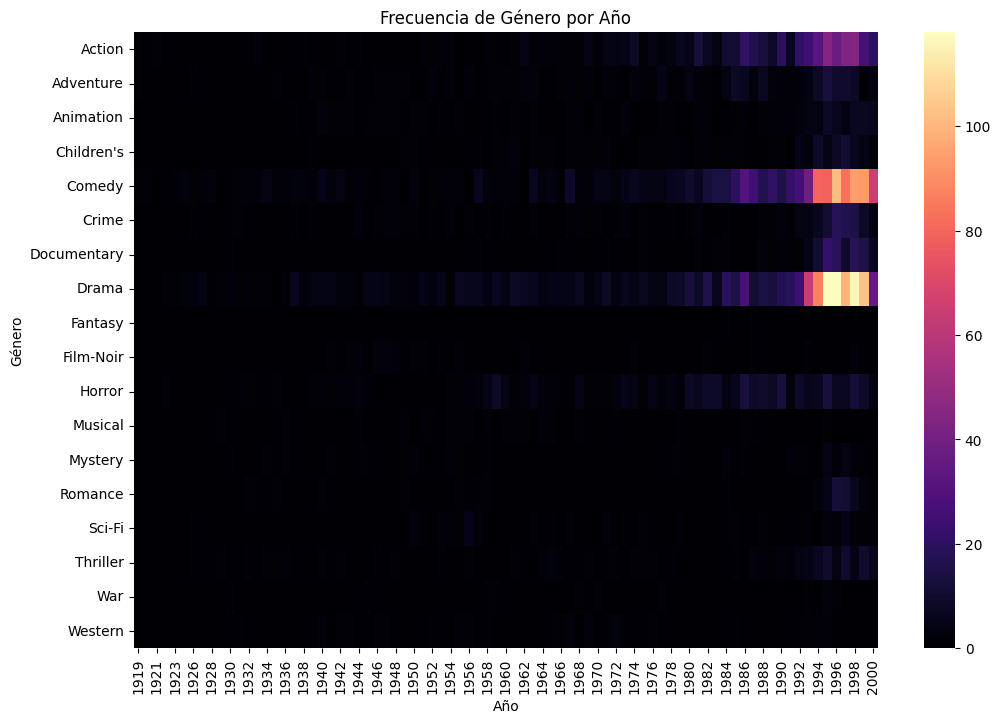

In [69]:
# Crear la matriz de frecuencia género-año
genero_anio_counts = df.groupby(['Genero_unico', 'año']).size().unstack(fill_value=0)

# Crear el heatmap con Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(genero_anio_counts, cmap='magma')
plt.xlabel('Año')
plt.ylabel('Género')
plt.title('Frecuencia de Género por Año')
plt.show()

Unint les dues idees de veure la freqüència dels gèneres i el nombre de pel·lícules al llarg dels anys, pel cas del gènere únic, es pot observar com els gèneres predominants ja esmentats de comèdia i drama són els que apareixen amb més freqüència al llarg dels anys fins a arribar als anys forts de producció de pel·lícules de 1995 a 1998, on es destaquen dels altres amb alguna comptabilitat molt més baixa per al gènere d'acció i una comptabilitat subtil per al gènere d'horror.

Juntando las dos ideas de ver la frecuencia de los géneros y el números de películas a lo largo de los años, para el caso del género único, se puede ver cómo los géneros predominantes ya comentados de comedia y drama son los que aparecen más a lo largo de los años hasta llegar a los años fuertes de producción de películas de 1995 a 1998 dónde se desmarcan de los demás con algún recuento, mucho menor, para el género de acción y un sutil recuento para el el caso de horror.

By combining the two ideas of observing the frequency of genres and the number of movies over the years, for the case of unique genre, it can be seen that the previously mentioned predominant genres of comedy and drama are the ones that appear most frequently throughout the years, until reaching the strong years of movie production from 1995 to 1998, where they stand out from the others with a much lower count for the action genre and a subtle count for the horror genre